In [673]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
from collections import Counter
from jupyterplot import ProgressPlot
%matplotlib inline

In [843]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self ,n, endpoint, sigma):

        assert (type(n)==int)
        assert (type(endpoint)==int or type(endpoint) == float)
        assert (type(sigma) == int or type(sigma) == float)
        
        #assert ratio of points to time interval must be greater than some value 

        self.n = n
        self.endpoint = endpoint
        self.sigma = sigma
        self.points = []
        self.normals = [0]
        self.t = 0
    

In [844]:
def liveplot(*objects):

    #pp = ProgressPlot(x_iterator=False, x_lim=[0, objects[0].endpoint], y_lim=[-3, 3])
    
    for obj in objects:
        obj.points = np.linspace(0, obj.endpoint, obj.n, endpoint=True)

        obj.t = obj.points[1] - obj.points[0]
        
        obj.normals = [0] #x0 = 0
        increments = np.random.normal(0, obj.sigma*np.sqrt(obj.t), size = obj.n - 1)
        obj.normals.extend(np.cumsum(increments))
        
        
    #for obj in objects:
        #for j in range(obj.n):
    plt.plot(obj.points, obj.normals)
            #pp.update(obj.points[j], obj.normals[j])
    plt.show()
    pp.finalize()
        
    

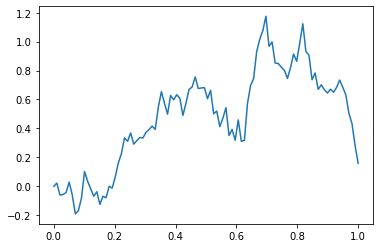

In [855]:
a = Brownian(100,1,1)
liveplot(a)

In [ ]:
def inversion_principle(obj, asymptote):
    
    pp = ProgressPlot(x_iterator=False, line_names=["B(u)", "B*(u)"])
    
    obj.points = np.linspace(0, obj.endpoint, obj.n, endpoint=True)

    obj.t = obj.points[1] - obj.points[0]
    obj.normals = [0] #x0 = 0
    obj.normals.extend(np.cumsum(np.random.normal(0, obj.sigma*np.sqrt(obj.t), size = obj.n - 1)))
    
    reflect = False

    for j in range(obj.n):
        
        if(obj.points[j]) >= asymptote:
            reflect = True
            
        if reflect == True:
            pp.update(obj.points[j], [[obj.normals[j], asymptote - obj.normals[j]]])
        else:
            pp.update(obj.points[j], [[obj.normals[j], obj.normals[j]]])
    pp.finalize()
        
    
    
    

In [860]:
a = Brownian(10000,1, 1)
inversion_principle(a,.1)